> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No-shown appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project 100K medical appointment record of Brazil is studied for appointment attandance. Many of paitient's characteristics are studied to find the features of no-show appointment. Following points are studied in details:
-Does the age of the Patients affect the appointment attandance?

- Does any specific day of the week have higher no show appoints than others? Which Age group requires more medical attentions?
- Which day of the week is less busy for hospitals?
- Wether the appointment booked well in advance has impact on attandance
- Whether sending SMS reminder is an effective way of improve the appointment attandance?
- Does gender plays a role on medical appointment attandance
- Which are the areas that need to work on appointment attandance?

**Need some help on how to link the questions in above shell to the relevant shell**

In [1283]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

%matplotlib inline

df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [1284]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- There is no missing values in this dataset

In [1285]:
# Drop some of the columns that is not relevent
df.drop(columns=['PatientId', 'AppointmentID', 'Handcap'])
df.head()
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

### Check for duplicate data

In [1286]:
print('Number of duplicated data:', +sum(df.duplicated()))

Number of duplicated data: 0


### Remove data that doesn't make sense i.e. age<0 
- age>100 is also removed since the data is very limited to represent the general trend

In [1287]:
df=df[df['Age']>=0]
#df=df[df['Age']<100]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


### Convert date in str to datetimestamp and introduce new column of Appointment Day of Week and waiting time

In [1288]:
# Check data type and convert date to datime
type(df['ScheduledDay'][0])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.head()
type(df['ScheduledDay'][0])
from datetime import datetime

#Convert datetime stamp to day of the week
df['AppointmentDayOfWeek']=df['AppointmentDay'].dt.dayofweek

#Add notice period to the df
df['Watiting_time']=(df['AppointmentDay']-df['ScheduledDay']).dt.days

#Drop Waiting time >0
#df=df[df['Watiting_time']>0]

#Not sure what is Handcap
df['Handcap']=df['Handcap'].astype(int)

#Add a new column of pre-existing conditons
df['Existing_Conditions']=df['Hipertension']+df['Diabetes']+df['Alcoholism']
#df['Existing_Conditions']=df['Hipertension']+df['Diabetes']+df['Alcoholism']

df.describe()



,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentDayOfWeek,Watiting_time,Existing_Conditions
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,1.858260,9.183794,0.299513
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,1.371667,15.255034,0.597657
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,14.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,178.000000,3.000000


### Convert No-show from Str to num for future attandance calculation

In [1289]:
#Add new column of Attandance attend=1 no-show=0
df['Attandance']=df['No-show'].replace({'No': 1, 'Yes': 0})


df_new=df
df_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   PatientId             110526 non-null  float64            
 1   AppointmentID         110526 non-null  int64              
 2   Gender                110526 non-null  object             
 3   ScheduledDay          110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay        110526 non-null  datetime64[ns, UTC]
 5   Age                   110526 non-null  int64              
 6   Neighbourhood         110526 non-null  object             
 7   Scholarship           110526 non-null  int64              
 8   Hipertension          110526 non-null  int64              
 9   Diabetes              110526 non-null  int64              
 10  Alcoholism            110526 non-null  int64              
 11  Handcap               110526 non-null  int32        

# Get an over view of the data

In [1290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   PatientId             110526 non-null  float64            
 1   AppointmentID         110526 non-null  int64              
 2   Gender                110526 non-null  object             
 3   ScheduledDay          110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay        110526 non-null  datetime64[ns, UTC]
 5   Age                   110526 non-null  int64              
 6   Neighbourhood         110526 non-null  object             
 7   Scholarship           110526 non-null  int64              
 8   Hipertension          110526 non-null  int64              
 9   Diabetes              110526 non-null  int64              
 10  Alcoholism            110526 non-null  int64              
 11  Handcap               110526 non-null  int32        

In [1291]:
# Have a look of overall data. Esppecially the distribution of each feature
def overview(col_name):
     x=df_new.columns.get_loc(col_name)
     age_y=df_new.groupby(df_new.columns[x],as_index=False).Attandance.mean()
     print('The attandace distribution between', col_name, 'as following')
     return age_y.head() 


In [1292]:
print(overview('Gender'))

The attandace distribution between Gender as following
  Gender  Attandance
0      F    0.796851
1      M    0.800321


- There is not much difference between genders on appointment attandance

In [1293]:
print(overview('Existing_Conditions'))

The attandace distribution between Existing_Conditions as following
   Existing_Conditions  Attandance
0                    0    0.790906
1                    1    0.822034
2                    2    0.822963
3                    3    0.820312


- People with existing conditons tends to have better attandance to appointments

In [1294]:
print(overview('AppointmentDayOfWeek'))

The attandace distribution between AppointmentDayOfWeek as following
   AppointmentDayOfWeek  Attandance
0                     0    0.793519
1                     1    0.799064
2                     2    0.803108
3                     3    0.806459
4                     4    0.787739


- On Fridays, there is slightly lower attandance for the appointments

In [1295]:
print(overview('SMS_received'))

The attandace distribution between SMS_received as following
   SMS_received  Attandance
0             0    0.832965
1             1    0.724255


- __It is suprising that patients received SMS have lower attandanc rate

In [1296]:
print(overview('Scholarship'))

The attandace distribution between Scholarship as following
   Scholarship  Attandance
0            0    0.801926
1            1    0.762637


- Peole with Scholarhip tend to have slightly lowered attandance 

In [1297]:
print(overview('Hipertension'))

The attandace distribution between Hipertension as following
   Hipertension  Attandance
0             0    0.790961
1             1    0.826980


- People with Hipertension seems have better attanndance

In [1298]:
print(overview('Diabetes'))

The attandace distribution between Diabetes as following
   Diabetes  Attandance
0         0    0.796370
1         1    0.819967


- People with Diabete seems have better attandance 

In [1299]:
print(overview('Alcoholism'))

The attandace distribution between Alcoholism as following
   Alcoholism  Attandance
0           0    0.798052
1           1    0.798512


- People with alcoholism showed similar attandance to people without the problem

In [1300]:
print(overview('Handcap'))

The attandace distribution between Handcap as following
   Handcap  Attandance
0        0    0.797645
1        1    0.820764
2        2    0.797814
3        3    0.769231
4        4    0.666667


- It is not obvious that handcap is an feature to group peole for low attandance rate

### Age is one of the main feature of the No-show appointment**

<function matplotlib.pyplot.show(close=None, block=None)>

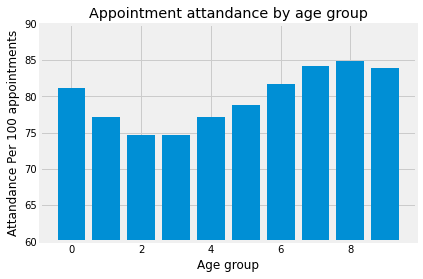

In [1301]:
#Group peoople into age groups, plot attandance of each age group in bar chart
bins=[0,5,10,18,25,35,45,55,65,75,105]
group_names=['Infant', 'Young Child','Teenager','18-25yrs','25-35yrs','35-45yrs','45-55yrs', '55-65yrs', '65-75yrs', 'over 75yrs']
df['Age_group']=pd.cut(df['Age'], bins, labels=group_names)

age_y=df.groupby('Age_group',as_index=False).mean()['Attandance']*100
age_x=df.groupby('Age_group',as_index=False).mean().index

y_mean=df_new.Attandance.mean()*100
y_mean=int(y_mean)

plt.xlabel('Age group')
plt.ylabel('Attandance Per 100 appointments')
plt.title('Appointment attandance by age group')

plt.ylim([60,90])
plt.bar(age_x,age_y)
plt.show


- This graph showed that age between 10-45yrs showed lower attandance to medical appointments

- Elderly people have higher than average attandance

**Need some help here ** 
How to add labels on each bar

## Which age group requires more medical attentions?

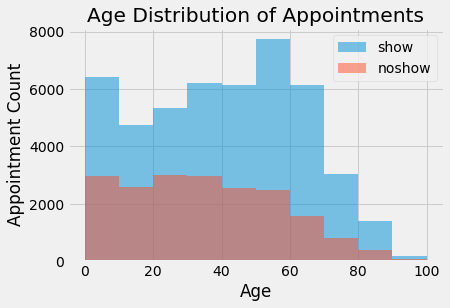

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDayOfWeek,Watiting_time,Existing_Conditions,Attandance,Age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,-1,1,1,55-65yrs
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,-1,0,1,55-65yrs
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,-1,0,1,55-65yrs
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,-1,0,1,Young Child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,-1,2,1,55-65yrs


In [1302]:
#Investigate the no show regarding to age grouns
plt.style.use('fivethirtyeight')
show=df_show['Age']
noshow=df_noshow['Age']
bins=np.linspace(0,100,11)
plt.hist(show, bins=bins, alpha=0.5, label='show')
plt.hist(noshow, bins=bins, alpha=0.5, label='noshow')
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Appointment Count')
plt.title('Age Distribution of Appointments')
plt.show()
#plt.xaxisplt.show()
type(df['Age'][1])
df.head()

- Childern under 10 years old tend to requires more medical attentention
- The data for pensioners (age>70yrs) is much lower than other age groups, so the attandance by age plot seems much more noise. 

### Which day of the week is less busy for hospitals?

In [1303]:
df_day=df.groupby('AppointmentDayOfWeek',as_index=False).Attandance.mean()
df_day.head(8)

,AppointmentDayOfWeek,Attandance
0,0,0.793519
1,1,0.799064
2,2,0.803108
3,3,0.806459
4,4,0.787739
5,5,0.769231


- Thursday has attandance rate of 78.7%
- Friday has attandance rate of 76.9%
- Both Thursday and Friday have lower than average attandance
- Still need to investigat whether the lowered attandance on Thursday and Friday is significant 

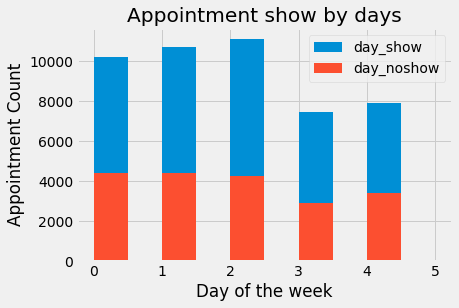

In [1304]:
#df['AppointmentDayOfWeek'].unique()
bin_w=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']

day_show=df_show['AppointmentDayOfWeek']
day_noshow=df_noshow['AppointmentDayOfWeek']

#day_show=day_show.sort_value(by=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'])
#day_noshow=day_show.sort_value(by=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'])

plt.hist(day_show, label='day_show')
plt.hist(day_noshow,  label='day_noshow')
plt.legend(loc=0)
#plt.xlabel('Day of the week')
plt.ylabel('Appointment Count')
plt.xlabel('Day of the week')
plt.title('Appointment show by days')
plt.show()
# Not sure how to label the columns here. If i conver the day of the week in letters this will not shown in the order any more

- Thursday and Friday are the days have less booked appointments

**Need help on how to label each bars**

## Explore wether the appointment booked well in advance has impact on attandance

<AxesSubplot:title={'center':'Waiting time with higest attandance '}, xlabel='Watiting_time', ylabel='Attandance'>

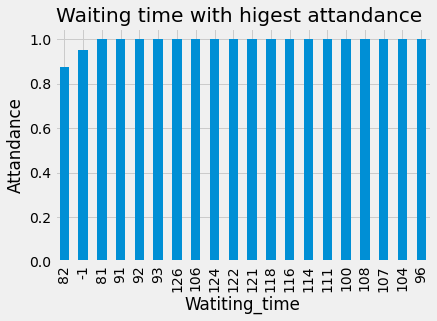

In [1305]:

df_notice=df_new.groupby('Watiting_time').Attandance.mean()
plt.ylabel('Attandance')
plt.title('Waiting time with higest attandance ')
df_notice.sort_values().tail(20).plot(kind='bar')
 

- Bookings made well in advance doesn't have much impact on the attandance
- Appointment made and attend on the same day tend to have high attandance

<AxesSubplot:title={'center':'Waiting time with lowest attandance '}, xlabel='Watiting_time', ylabel='Attandance'>

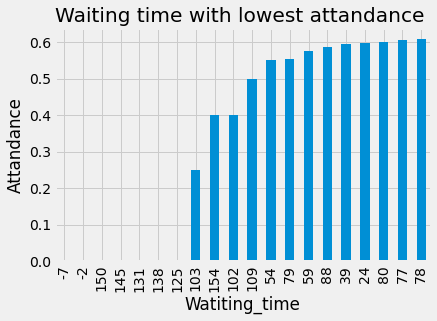

In [1306]:
plt.ylabel('Attandance')
plt.title('Waiting time with lowest attandance ')
df_notice.sort_values().head(20).plot(kind='bar')

- Here in this graph showed the bookings with lowest attandance and its waiting time. 
- There isn't any obious relationship between waiting time and appointment attandance.

### Explore whether sending SMS is an effective way to improve attandance

In [1307]:
df_SMS=df.groupby('SMS_received').Attandance.mean()
df_SMS.head()

SMS_received
0    0.832965
1    0.724255
Name: Attandance, dtype: float64

- People with SMS reminder has lower attandance (72.4%) than people didn't receive (83.3%) SMS 
- It might be worth to investigate when the SMS reminder was send. It could be more effective when send closer to the appointment date.

25696


Text(0.5, 1.0, 'SMS reminder impact')

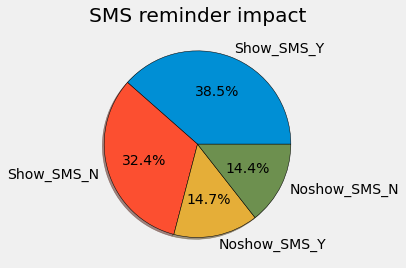

In [1320]:

#plot SMS figures
from datetime import datetime
plt.style.use('fivethirtyeight')

Show_SMS_Y=df_show.SMS_received[df_show['SMS_received']==1].count()
Show_SMS_N=df_show.SMS_received[df_show['SMS_received']==0].count()
Noshow_SMS_Y=df_noshow.SMS_received[df_noshow['SMS_received']==1].count()
Noshow_SMS_N=df_noshow.SMS_received[df_noshow['SMS_received']==0].count()
print(Show_SMS_Y)
pie_show=[Show_SMS_Y,Show_SMS_N,Noshow_SMS_Y,Noshow_SMS_N ]
#colors=['#008fd5','#6d904f','#fc4f30','#e5ae37']
labels=['Show_SMS_Y', 'Show_SMS_N','Noshow_SMS_Y','Noshow_SMS_N']
plt.pie(pie_show, labels=labels, shadow=True, startangle=0,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'})
plt.title('SMS reminder impact')


<function matplotlib.pyplot.show(close=None, block=None)>

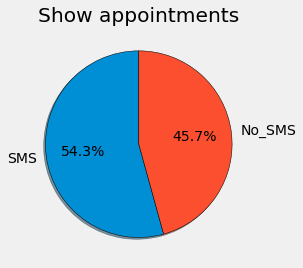

In [1321]:
pie_show=[Show_SMS_Y,Show_SMS_N]

labels=['SMS','No_SMS']
plt.pie(pie_show, labels=labels, shadow=True, startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'})
plt.title('Show appointments')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

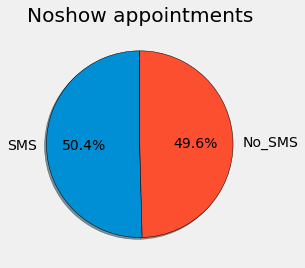

In [1322]:
pie_show=[Noshow_SMS_Y,Noshow_SMS_N]

labels=['SMS','No_SMS']
plt.pie(pie_show, labels=labels, shadow=True, startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'})
plt.title('Noshow appointments')
plt.show

- People with scholarship has appointment attandanc of 76% where people without scholarship has attandance of 80%
- It is might be difficult to decide the attandance of appointment by scholarship status

## Explore if there is a gender difference in appointment attandance

In [1323]:
#Calculate attandance rate by Gender

df_new=df_show.append(df_noshow)
df_gender=df.groupby('Gender').Attandance.mean()
df_gender.head()

df_new.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDayOfWeek,Watiting_time,Existing_Conditions,Attandance
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,4,1,1,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,4,1,0,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,4,1,0,1
15,9.994839e+10,5620206,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,No,4,2,0,1
18,1.713538e+13,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,No,4,2,0,1


- Female has an attandance rate of 79.6%
- Male has an attandance rate of 80.0%
- Gender is not an obvious character to determine medical appointment attandance

In [1324]:
#Appointment attend by females
df.Gender[df['Gender']=='F'].count()

71839

In [1325]:
#Total appointment numbers
df.Gender.count()

110526

In [1326]:
71839/110526

0.6499737618297957

- Female take almost two thirds of all appointments

31739


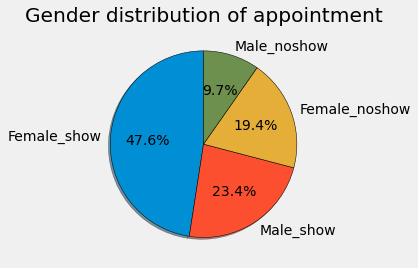

In [1327]:
#plot Gender 
from datetime import datetime
plt.style.use('fivethirtyeight')

Show_F=df_show.Gender[df_show['Gender']=='F'].count()
Show_M=df_show.Gender[df_show['Gender']=='M'].count()
Noshow_F=df_noshow.Gender[df_noshow['Gender']=='F'].count()
Noshow_M=df_noshow.Gender[df_noshow['Gender']=='M'].count()
print(Show_F)
pie_show=[Show_F,Show_M,Noshow_F,Noshow_M ]
#colors=['#008fd5','#6d904f','#fc4f30','#e5ae37']
labels=['Female_show', 'Male_show','Female_noshow','Male_noshow']
plt.pie(pie_show, labels=labels, shadow=True, startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'})
plt.title('Gender distribution of appointment')
plt.show

pie_show=[Show_F,Noshow_F]

 - From above graph, we can see that woman attands the morjority of all appointments booked. 

### An overall view of appointment attandance by area

<AxesSubplot:title={'center':'Neighbourhood has lowest attandance'}, xlabel='Neighbourhood', ylabel='Attandance rate'>

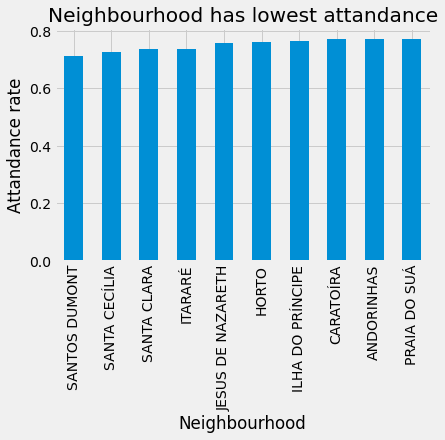

In [1328]:
df_nei=df.groupby('Neighbourhood').Attandance.mean()

#Dropped the lowest count area, because there was only one appointment booked
df_low_area=df_nei.sort_values().head(11)[1:]
df_low_area.head()

df_low_area.columns=lst
plt.title('Neighbourhood has lowest attandance')

plt.ylabel('Attandance rate')

plt.xlabel('Neibourhood')

df_low_area.head(11).plot(kind='bar')


In [1329]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

- These is a graph highlighted the areas with lower than average attandance. 
- This could potentially provide the areas for future improvements

## Explore if people has pre-existing medical conditions has better attandance

In [1330]:
df_ec=df_new.groupby('Existing_Conditions').Attandance.mean()
df_ec.head()

Existing_Conditions
0    0.697329
1    0.749228
2    0.745902
3    0.756250
Name: Attandance, dtype: float64

- People with pre-existing condions(including one of more these conditions, Hipertension, Diabetes) showed slightly higher attandance to their appointments	

<a id='conclusions'></a>
## Conclusions

**Result:**
 - It seem that the age of the patients has some impact on no-show appointment. Young adult between 10 and 45 years old is the group has lower than average attandance
 
 - It is intrestesting that SMS reminder didn't help with improving appointemnt attandance. It might be worth look into the when the SMS was sent. Sending SMS closer to the appointment might have some impact.
 
 - People with prexisting conditions tend to has silghty higher attandance to their appointment. This could be these people pays more attention to their health.
 
 - Eventhough there was no much difference in attandance between genders. Women tend to pay more attention to their health, with more appointments booked and attended. 
 
 - Chidre (under 10yeas) is the age goup with most appointment booked. 
 
 - Generally speaking, Thursday and Friday are the less busy days for doctors. We should encourge them book holidays on these days where possible
 

**Limitations:**
 - There wasn't too much details that how the data was collected, Such as when the SMS reminder was sent, at the booking or just before the appointment. It is considerded that sending SMS closer to the appointment would acturally help with attandance. 
 
 - Most of the result was direct observation of the the data. There wasn't much statistial analysis to confirm the observations are statistical significant.

A list of resources used:  N/A  I did not use any such resources